In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [204]:
class Perceptron:
    
    def __init__(self,pesos_iniciales=[],nombre_dataset=""):   
        
        self.dataset_original= pd.read_csv(nombre_dataset)
        
        self.dataset = self.dataset_numpy(self.dataset_original)
        self.numero_entradas = len(self.dataset[0])-1
        
        
        if(len(pesos_iniciales)>0):
            self.pesos = pesos_iniciales
        else:
            self.pesos = np.random.randn(self.numero_entradas)      
        print("pesos iniciales:",self.pesos)
        self.historial_pesos = []
        
        self.umbral = 0.5
        self.tasa_aprendizaje = 0.1
    
    def entrenar(self):        
        
        while True:
            contador_errores = 0
            salidas = [0]*self.numero_entradas
            salida_final = [0]*self.numero_entradas
            #print("==========================")
            
            #Recorremos el dataset desde 0 hasta el numero total de conjunto de valores (x0,x1,xn...)
            for i in range(0,len(self.dataset)):
                red=0
                suma = 0
                
                #con este for recorremos cada valor x0,x1,xn y a la vez recorremos el arreglo de pesos y generamos
                #la suma ponderada de las salidas
                for j in range(0,self.numero_entradas):
                    # W(i) = W(j) * X(i)(j)
                    salidas[j] = self.pesos[j]*self.dataset[i][j]                    
                    suma += salidas[j]                  
                
                #aqui revisamos el resultado de la salida y lo comparamos con el umbral
                #y dado que el valor si o si lo necesitamos como numero, al valor boleando lo multiplicamos x 1 -
                #para transformarlo
                red = (suma>self.umbral)*1
                
                error = self.dataset[i][-1] - red
                
                #En caso de que no haya un error, no necesitamos corregir nada entonces, 
                #por lo tanto este if sirve para saltear la operacion
                if error != 0:
                    contador_errores +=1                
                    correccion = error * self.tasa_aprendizaje
                    #aplicamos las correcciones
                    for j in range(0,self.numero_entradas):
                        salida_final[j] = (correccion*self.dataset[i][j])+self.pesos[j]
                
                    self.pesos = salida_final
                
                #print("salidas:",salidas)
                #print("red:",red)
                #print("suma:",suma)
                #print("error:",error)
                #print("correccion:",correccion)
                #print("pesos salida:",self.pesos)
                #print("#####################")
                self.historial_pesos.append(self.pesos)
            if contador_errores == 0:
                break
        print("Entrenamiento terminado, pesos finales:")
        print(self.pesos)
        
    def usar_valores_finales(self, datos_nuevos,if_zero, if_uno):
            
        salidas = [0]*self.numero_entradas
        suma = 0
            
        for j in range(0,self.numero_entradas):
            # W(i) = W(j) * X(i)(j)
            salidas[j] = self.pesos[j]*datos_nuevos[j]                    
            suma += salidas[j]
        red = (suma>self.umbral)*1
        print(red)
        if red:
            print("Es " + if_uno)
        else:
            print("Es " + if_zero)
    
    def dataset_numpy(self,dataset):
        dataset = dataset.to_numpy()
        return dataset
    
    def dataset_get_columnas(self):
        nombres = list(self.dataset_original)
        return nombres
    
    def graficar(self,columna_x,columna_y,columna_clases):
        clases = self.dataset_original[[columna_clases]] + 3
        clases= clases.to_numpy()
        columnas_seleccionadas = self.dataset_original[[columna_y,columna_x]]
        columnas_seleccionadas_numpy = columnas_seleccionadas.to_numpy()
        y = columnas_seleccionadas_numpy[:,0];
        x = columnas_seleccionadas_numpy[:,1];
        plt.xlabel(columna_x)
        plt.ylabel(columna_y)
        plt.scatter(x,y,c=clases)
        plt.show()

In [205]:
nombre_dataset = "prueba.csv"
perceptron = Perceptron(nombre_dataset=nombre_dataset)
perceptron.entrenar()

pesos iniciales: [ 1.55421357 -2.17857197 -0.09372471]
Entrenamiento terminado, pesos finales:
[6.241213574078305, -0.17857197398401947, 20.80627528740431]


In [104]:
perceptron.dataset_get_columnas()

['altura', 'pesos', 'sexo', 'z']

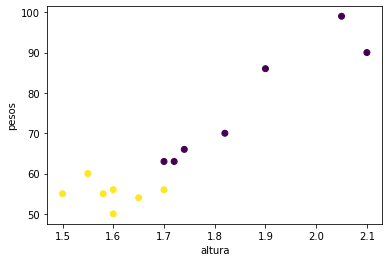

In [206]:
perceptron.graficar('altura',"pesos","sexo")

In [177]:
dataset = perceptron.dataset[:,:2]
pesos = np.asarray(perceptron.historial_pesos)

In [69]:
#Caso de prueba
sepal_length=5
sepal_width=3.4
petal_length=1.5
petal_width=0.2

datos =[sepal_length,
sepal_width,
petal_length,
petal_width]
perceptron.usar_valores_finales(datos,"Iris-setosa","Iris-versicolor")

0
Es Iris-setosa
